In [ ]:
from keras.models import load_model, Model
from keras.layers import Dense, Flatten, MaxPooling2D
from keras.layers import Conv2D, Lambda, Input, Activation
from keras.layers import LSTM, TimeDistributed, Bidirectional, GRU
from keras.layers.merge import add, concatenate
from keras.optimizers import SGD
from keras import backend as K
from new_multi_gpu import *
from models_multi import *

# import warpctc_tensorflow
import tensorflow as tf
import random 
import keras
import numpy as np 

# class CRNN(object):
# 	"""docstring for RNN"""
# 	def __init__(self, learning_rate = 0.001, output_dim = 63, gpu_count=2):
# 		conv_filters = 16
# 		kernel_size = (3, 3)
# 		pool_size = 2
# 		time_dense_size = 32
# 		rnn_size = 512
# 		img_h = 32
# 		act = 'relu'

# 		self.width = K.placeholder(name= 'width', ndim =0, dtype='int32')
# 		self.input_data = Input(name='the_input', shape=(None, img_h, 1), dtype='float32')
# 		self.inner = Conv2D(conv_filters, kernel_size, padding='same',
# 					activation=act, kernel_initializer='he_normal',
# 					name='conv1')(self.input_data)
# 		self.inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max1')(self.inner)
# 		self.inner = Conv2D(conv_filters, kernel_size, padding='same',
# 					activation=act, kernel_initializer='he_normal',
# 					name='conv2')(self.inner)
# 		self.inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max2')(self.inner)

# 		self.inner = Lambda(self.res, arguments={"last_dim": (img_h // (pool_size ** 2)) * conv_filters \
#                                                 , "width": self.width // 4})(self.inner)

# 		# cuts down input size going into RNN:
# 		self.inp = Dense(time_dense_size, activation=act, name='dense1')(self.inner)
# 		self.batch_norm = keras.layers.normalization.BatchNormalization()(self.inp)
# 		self.gru_1 = Bidirectional(GRU(rnn_size, return_sequences=True, kernel_initializer='he_normal',\
# 									 name='gru1'),merge_mode="sum")(self.batch_norm)
# 		self.gru_2 = Bidirectional(GRU(rnn_size, return_sequences=True, kernel_initializer='he_normal',\
# 									 name='gru2'),merge_mode="concat")(self.gru_1)
# 		self.gru_3 = Bidirectional(GRU(rnn_size, recurrent_dropout=0.5, return_sequences=True, \
# 								kernel_initializer='he_normal', name='gru3'),merge_mode="concat")(self.gru_2)
# 		self.gru_4 = Bidirectional(GRU(rnn_size, recurrent_dropout=0.5, return_sequences=True, \
# 								kernel_initializer='he_normal', name='gru4'),merge_mode="concat")(self.gru_3)
# 		self.y_pred = TimeDistributed(Dense(output_dim, kernel_initializer='he_normal', \
# 		              			name='dense2', activation='linear'))(self.gru_4)

# 		self.model = Model(inputs=self.input_data, outputs=self.y_pred)
# 		self.model = make_parallel(self.model, gpu_count)
# 		self.model.summary()
		
# 		self.output_ctc = self.model.outputs[0]	
# 		self.out = K.function([self.input_data, self.width, K.learning_phase()], [self.y_pred])

# 		self.y_true = K.placeholder(name='y_true', ndim=1, dtype='int32')
# 		self.input_length = K.placeholder(name='input_length', ndim=1, dtype='int32')
# 		self.label_length = K.placeholder(name='label_length', ndim=1, dtype='int32')
# 		self.test = K.argmax(self.y_pred, axis=2)
# 		self.predict_step = K.function([self.input_data, self.width, K.learning_phase()], [self.test])

# 	def res (self, x, width, last_dim):
# 		return K.reshape(x, (-1, width, last_dim))

In [1]:
from models_multi import CRNN
M = CRNN(1e-4, 219)
M.model.load_weights('crnn_219.h5')

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
the_input (InputLayer)           (None, None, 32, 1)   0                                            
____________________________________________________________________________________________________
lambda_2 (Lambda)                (None, None, 32, 1)   0           the_input[0][0]                  
____________________________________________________________________________________________________
lambda_3 (Lambda)                (None, None, 32, 1)   0           the_input[0][0]                  
____________________________________________________________________________________________________
model_1 (Model)                  (None, None, 219)     14497579    lambda_2[0][0]                   
                                                                   lambda_3[0][0]          

In [ ]:
model = M.model.get_layer('model_1')
model.summary()

In [ ]:
model.layers.pop()

In [ ]:
from keras.layers import TimeDistributed, Dense
from keras.models import Model
x = model.layers[-1].output
y_pred = TimeDistributed(Dense(219, kernel_initializer='he_normal', \
                               name='denseout', activation='linear'))(x)
new_model = Model(input=model.inputs, output=y_pred)

In [ ]:
new_model.summary()

In [ ]:
from new_multi_gpu import make_parallel
final_model = make_parallel(new_model, 2)
final_model.summary()

In [ ]:
final_model.save_weights('crnn_219.h5')

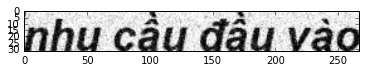

WẸẦÓCÊVFVóéỗÉWwÓwÌFVé?I0IwFÉéễéộỡó3C.wW


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from utils import pred, reshape
from scipy import ndimage

ims = os.listdir('./test/nhu cầu đầu vào')
im = './test/nhu cầu đầu vào/' + np.random.choice(ims)
# im = '/home/tailongnguyen/deep-anpr/output/0.png'
im = ndimage.imread(im)
plt.imshow(im, cmap ='gray')
plt.show()
im = np.expand_dims(reshape(im), axis = 0)
im.shape
pred(im, M, None, True)